# Hole detection in fences with YoloV5

## Setup

In [1]:
import torch
from IPython.display import Image, clear_output

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Setup complete. Using torch 1.6.0 _CudaDeviceProperties(name='GeForce GTX 1050 Ti', major=6, minor=1, total_memory=4040MB, multi_processor_count=6)


## YoloV5

In [2]:
# !python yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source yolov5/data/images/
# Image(filename='runs/detect/exp/zidane.jpg', width=600)

## Training

In [3]:
%load_ext tensorboard
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 31600), started 0:05:07 ago. (Use '!kill 31600' to kill it.)

In [4]:
!python yolov5/train.py \
    --img 640 \
    --batch 12 \
    --epochs 100 \
    --data data/holes_in_fence_v2/data.yaml \
    --weights runs/train/hole/weights/best.pt \
    --name hole_v2 \
    --exist-ok \
    --adam

Using torch 1.6.0 CUDA:0 (GeForce GTX 1050 Ti, 4040MB)

Namespace(adam=True, batch_size=12, bucket='', cache_images=False, cfg='', data='data/holes_in_fence_v2/data.yaml', device='', epochs=100, evolve=False, exist_ok=True, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='hole_v2', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/hole_v2', single_cls=False, sync_bn=False, total_batch_size=12, weights='runs/train/hole/weights/best.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hs

      9/99     2.29G   0.02324   0.01768         0   0.04092        51       640
               Class      Images     Targets           P           R      mAP@.5
                 all         105         256       0.839       0.812       0.855       0.589

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     10/99     2.29G   0.02541   0.01902         0   0.04442        50       640
               Class      Images     Targets           P           R      mAP@.5
                 all         105         256         0.8       0.926       0.947       0.724

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     11/99     2.29G   0.02577   0.01693         0    0.0427        51       640
               Class      Images     Targets           P           R      mAP@.5
                 all         105         256       0.408       0.914        0.91       0.661

     Epoch   gpu_mem       box       obj       cls     total   targets

               Class      Images     Targets           P           R      mAP@.5
                 all         105         256       0.533       0.949        0.94       0.731

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     34/99     2.29G   0.02551   0.01817         0   0.04368        54       640
               Class      Images     Targets           P           R      mAP@.5
                 all         105         256       0.707       0.883       0.907       0.693

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     35/99     2.29G    0.0259     0.018         0    0.0439        37       640
               Class      Images     Targets           P           R      mAP@.5
                 all         105         256       0.701       0.914       0.938       0.733

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     36/99     2.29G   0.02541   0.01884         0   0.04425        45


     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     58/99     2.29G   0.02293   0.01719         0   0.04011        38       640
               Class      Images     Targets           P           R      mAP@.5
                 all         105         256       0.858       0.949       0.962       0.766

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     59/99     2.29G   0.02157   0.01708         0   0.03865        49       640
               Class      Images     Targets           P           R      mAP@.5
                 all         105         256       0.633       0.977       0.978       0.789

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     60/99     2.29G    0.0228   0.01671         0   0.03951        28       640
               Class      Images     Targets           P           R      mAP@.5
                 all         105         256       0.792        0.98       0.982  

     82/99     2.29G   0.01907   0.01512         0   0.03419        46       640
               Class      Images     Targets           P           R      mAP@.5
                 all         105         256       0.847       0.965       0.978       0.814

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     83/99     2.29G   0.01925   0.01528         0   0.03453        42       640
               Class      Images     Targets           P           R      mAP@.5
                 all         105         256       0.785       0.977        0.98       0.814

     Epoch   gpu_mem       box       obj       cls     total   targets  img_size
     84/99     2.29G   0.01911   0.01393         0   0.03304        38       640
               Class      Images     Targets           P           R      mAP@.5
                 all         105         256       0.876       0.973       0.989       0.824

     Epoch   gpu_mem       box       obj       cls     total   targets

Train batch 0


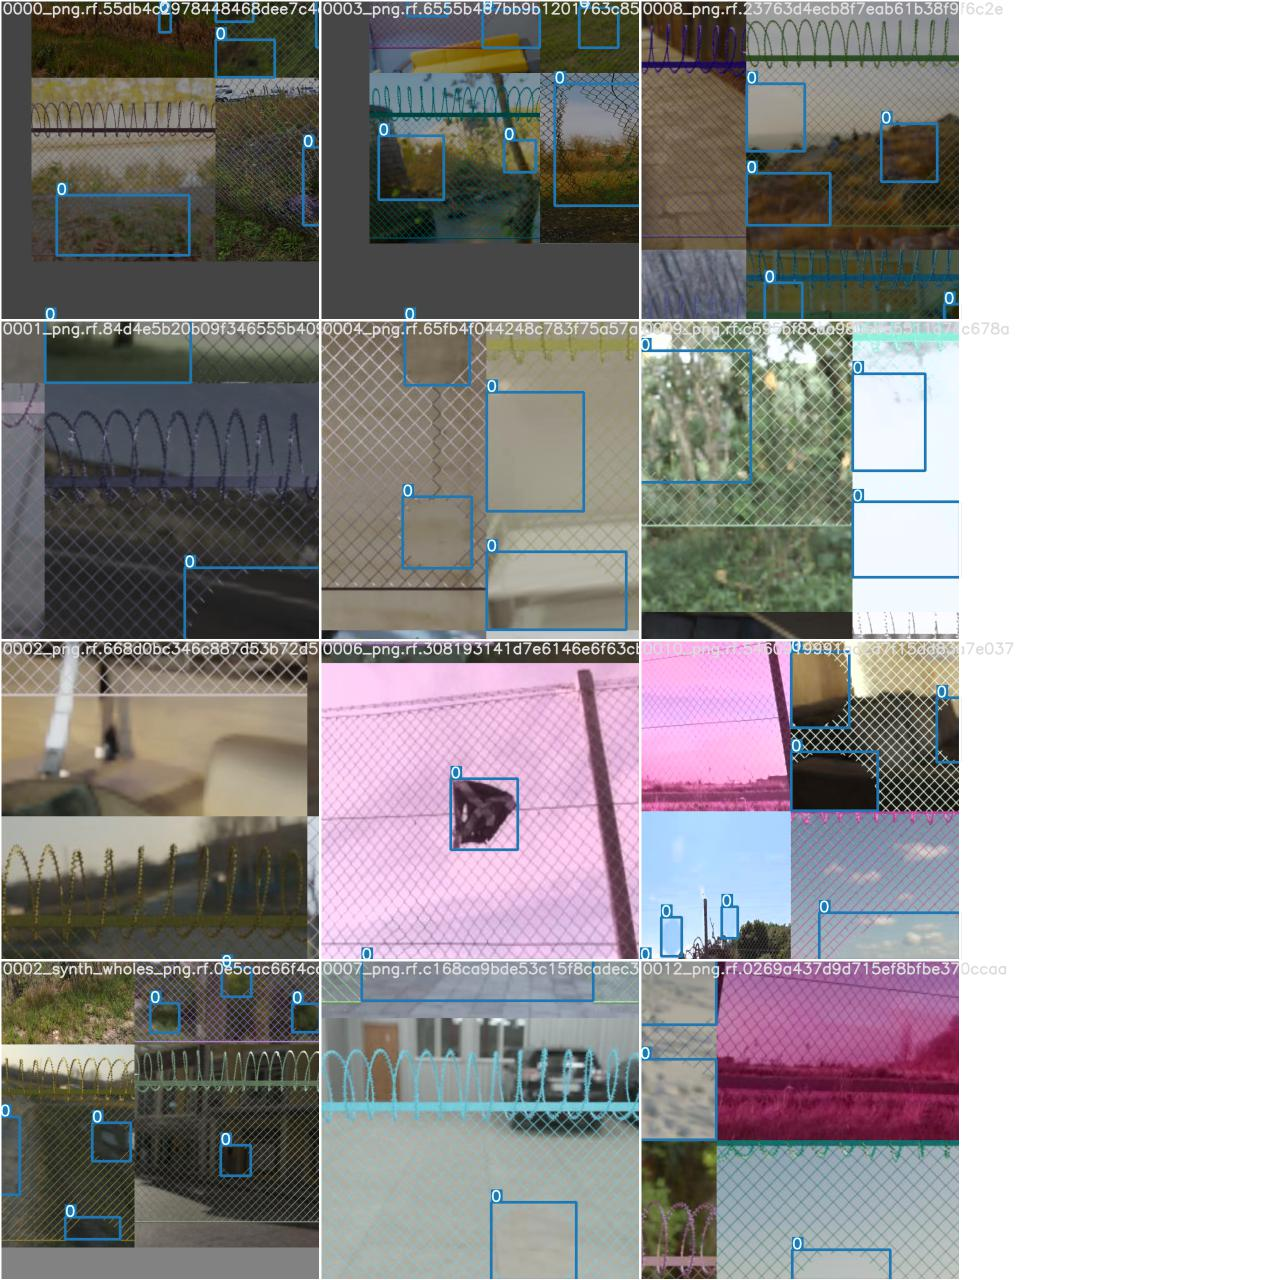

In [10]:
print('Train batch 0')
Image(filename='runs/train/hole_v2/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels

Test batch 0 predictions


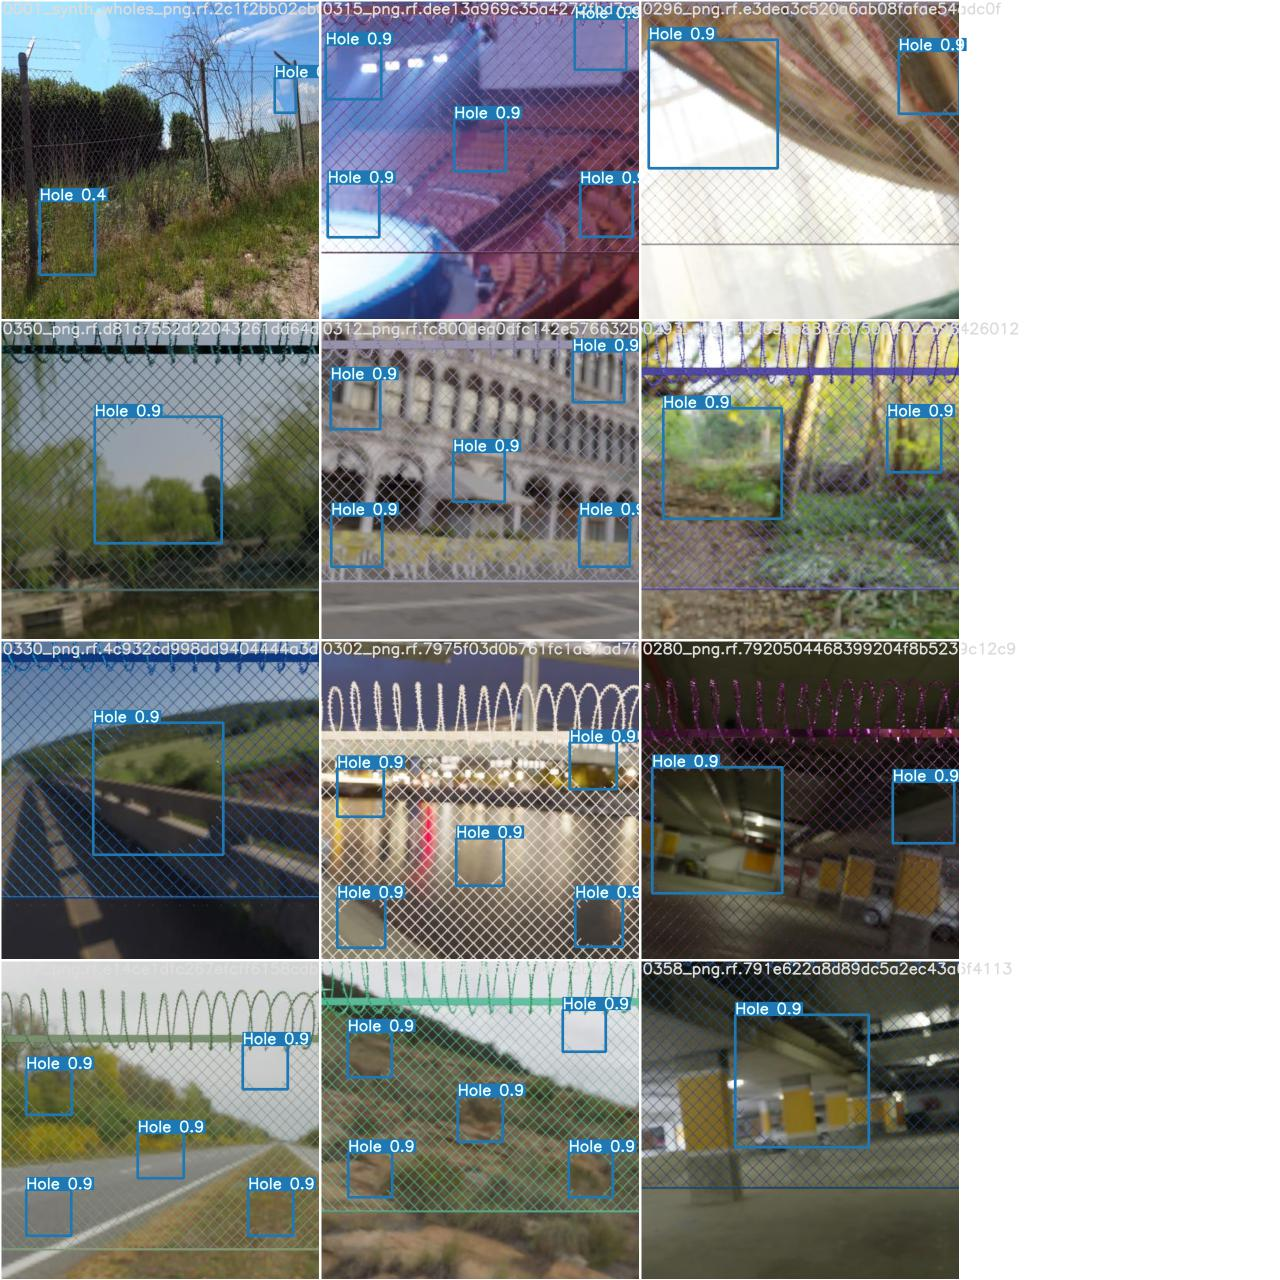

In [12]:
print('Test batch 0 predictions')
Image(filename='runs/train/hole_v2/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

Results


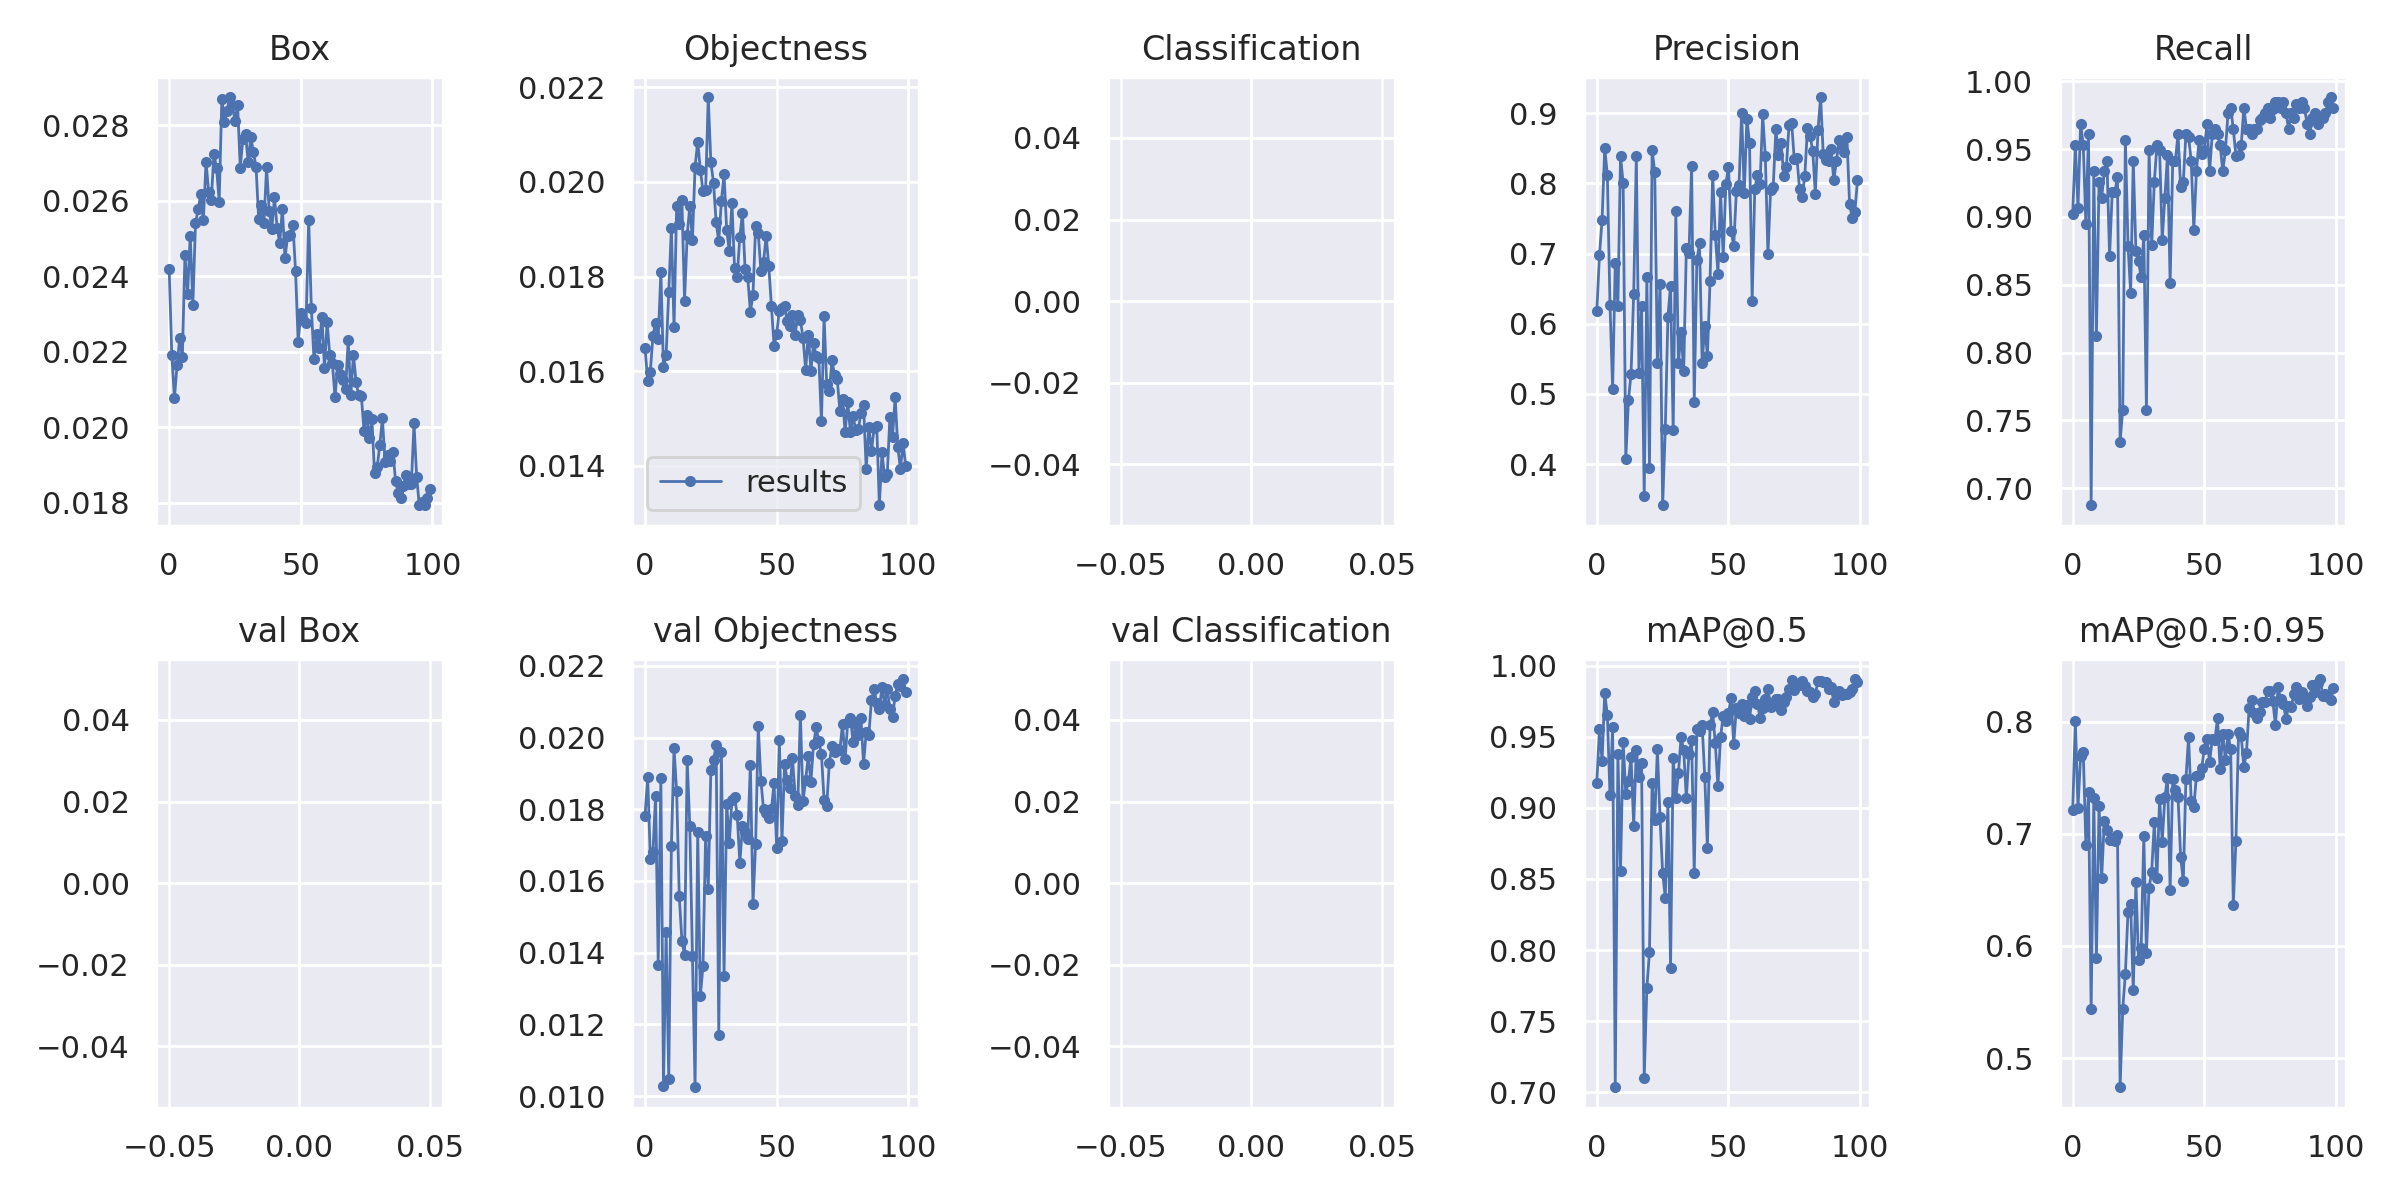

In [13]:
print('Results')
Image(filename='runs/train/hole_v2/results.png', width=800)

Precision recall curve


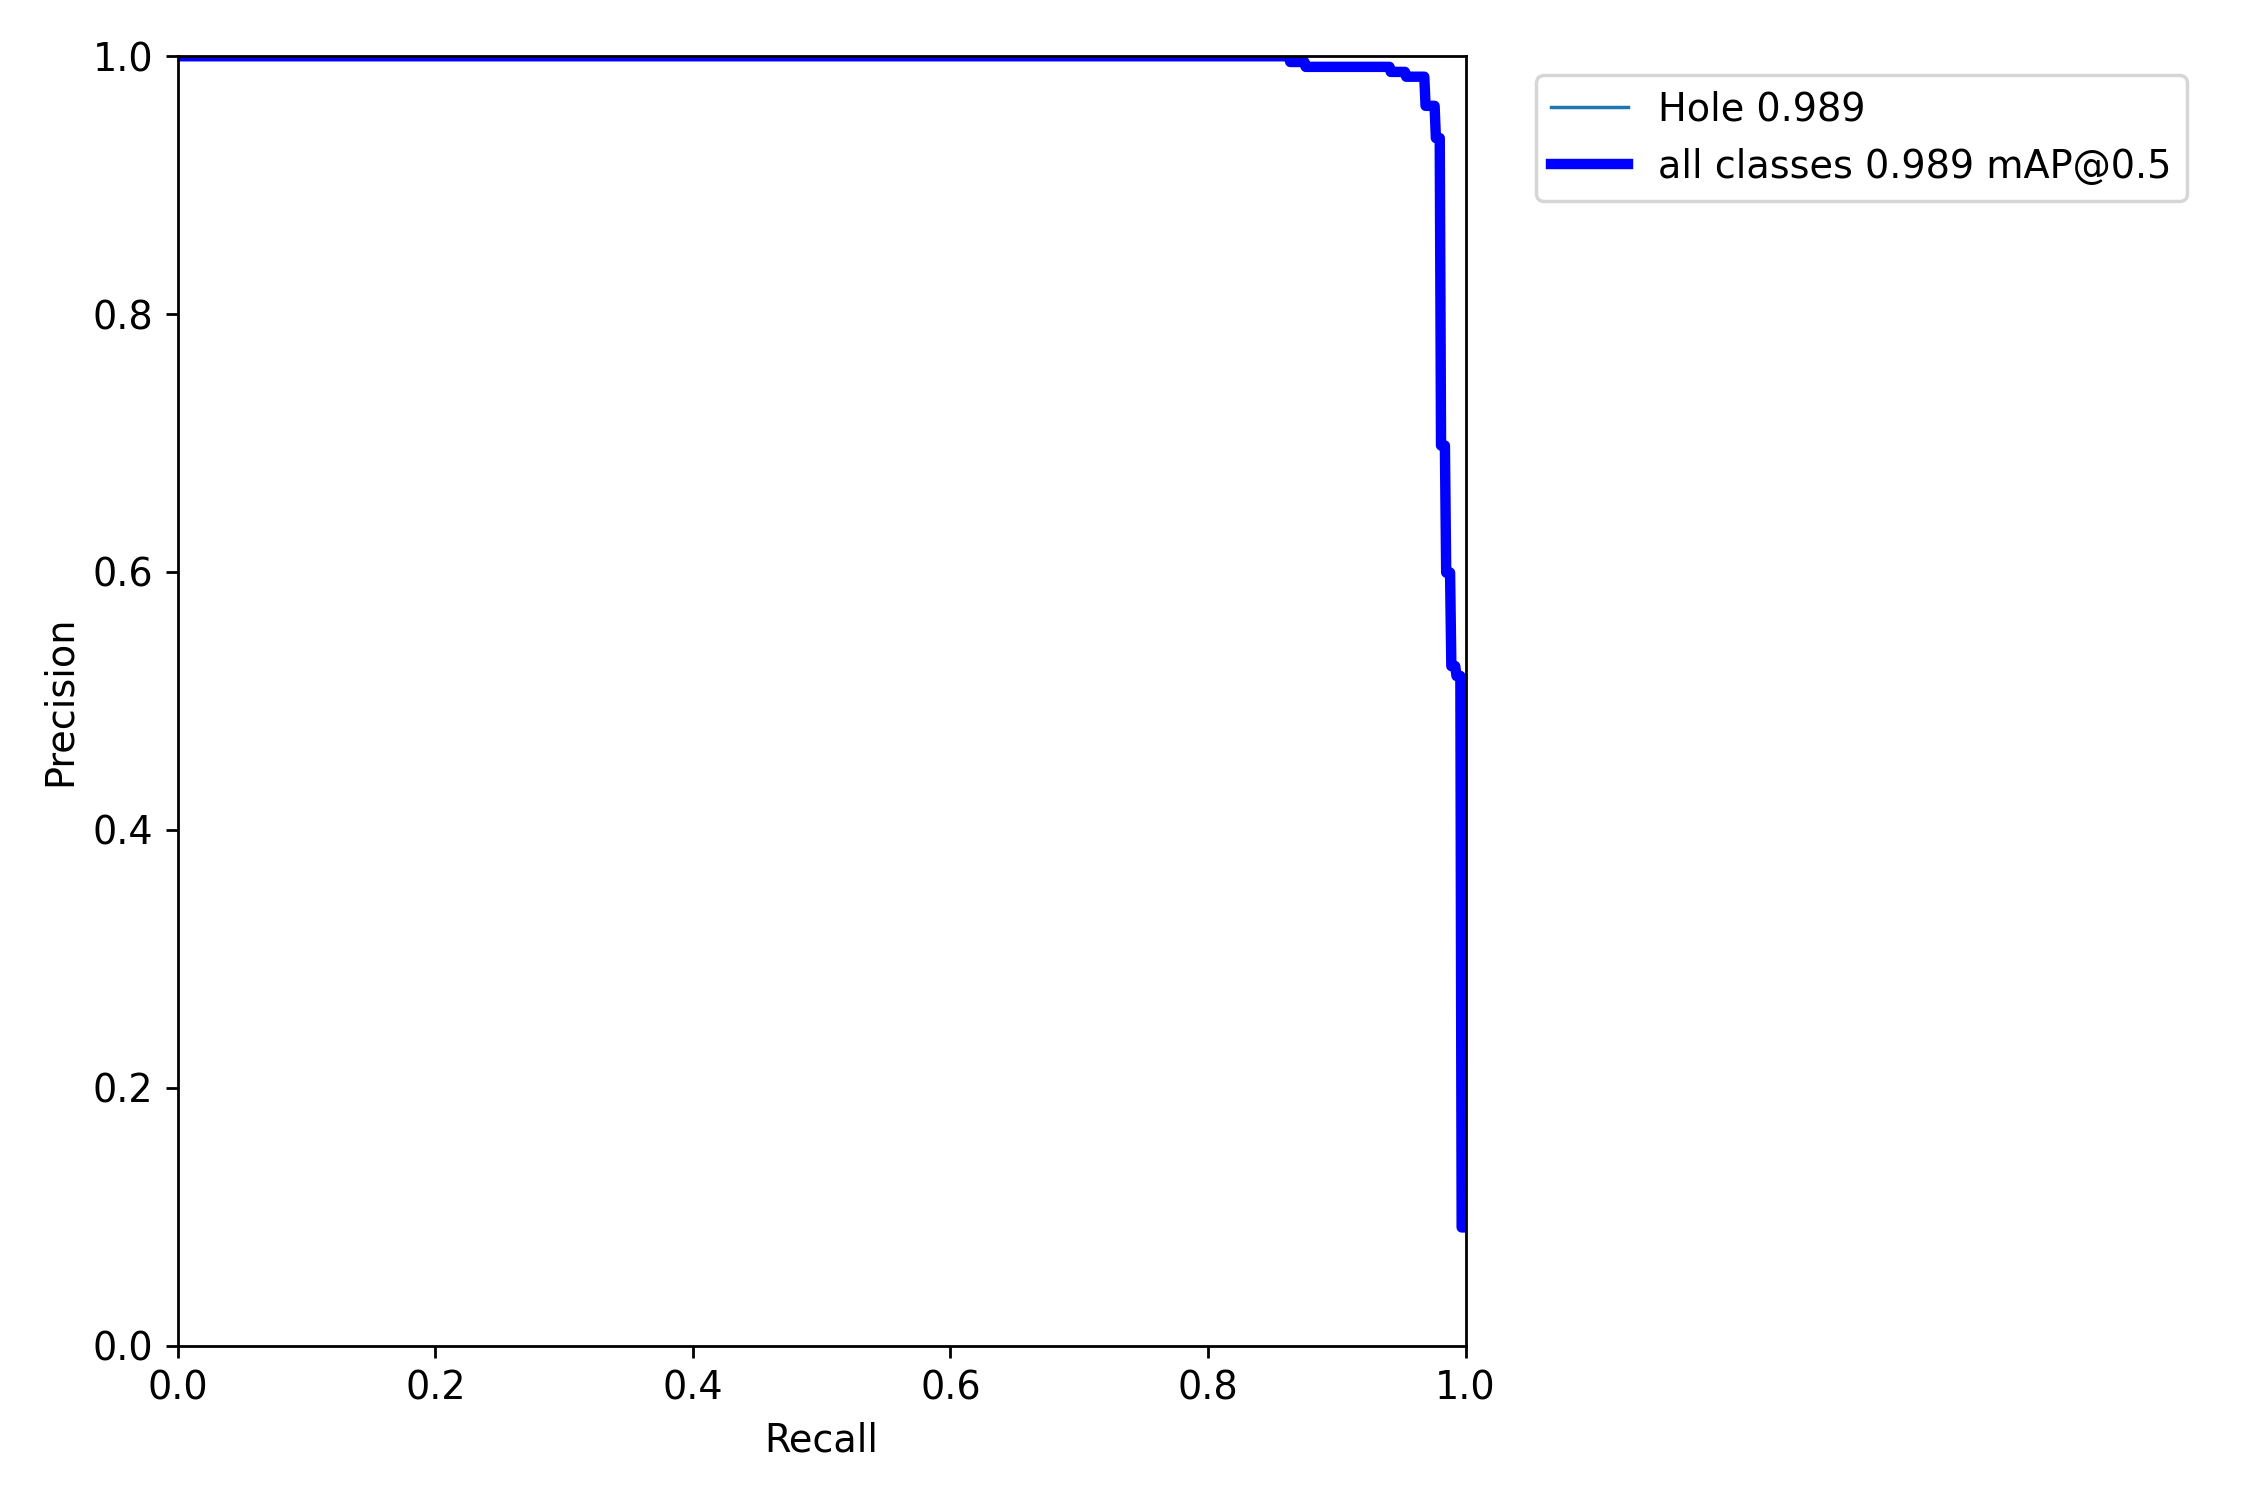

In [14]:
print('Precision recall curve')
Image(filename='runs/train/hole_v2/precision_recall_curve.png', width=800)